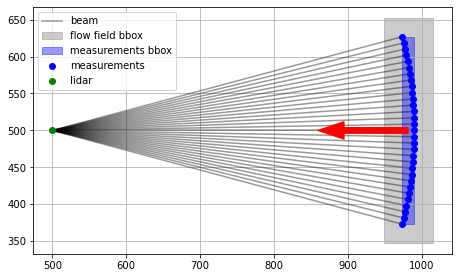

In [2]:
import mocalum as mc
import numpy as np
import xarray as xr

koshava_xyz = np.array([500, 500, 0])
no_scans = 1000
# wind field setup
ref_height = 100      # power law reference height
meas_height = 100 
shear_exponent = 0.2  # power law shear exponent
wind_speed = 8       # wind speed at referenec height
wind_dir = 20 # wind direction
w = 0 

# beam steering setup
distance = 500   # meter
elevation = np.degrees(np.arcsin(meas_height / distance))
angular_res = 1   # degree
azimuth_mid = 45  # central azimuth angle
sector_size = 30  # degree
scan_speed = 1    # degree.s^-1
max_speed = 50    # degree.s^-1
max_acc = 100     # degree.s^-2

# Uncertainty terms
no_sim = 10000 # number of simulations
corr_coef = 0  # correlation coefficient
mu = 0         # we assume no systematic uncertainty
azim_std = 0.1 # degrees
elev_std = 0.1 # degrees
dis_std = 10   # meters
rad_std = 0.1  # m.s-1  In [23]:  
pl_mc = mc.Mocalum()
pl_mc.add_lidar('sterenn', koshava_xyz)
pl_mc.add_lidar('koshava', koshava_xyz)

pl_mc.set_ivap_probing('koshava', sector_size, 90, angular_res, elevation, distance, 
                    no_scans, scan_speed, max_speed,max_acc)

#pl_mc.set_ivap_probing('sterenn', sector_size*2, azimuth_mid, angular_res, elevation, distance, 
#                    no_scans, scan_speed, max_speed,max_acc)
#pl_mc.data.probing['koshava']

pl_mc.gen_plaw_ffield('koshava',wind_speed, 90, w, ref_height, shear_exponent)
mc.plot_mocalum_setup('koshava', 'koshava',pl_mc)


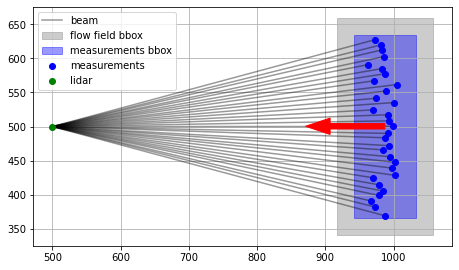

<xarray.Dataset>
Dimensions:      (time: 31000)
Coordinates:
  * time         (time) float64 0.0 1.0 2.0 3.0 ... 3.11e+04 3.11e+04 3.11e+04
Data variables:
    az           (time) float64 75.0 76.0 77.0 78.0 ... 102.0 103.0 104.0 105.0
    el           (time) float64 11.54 11.54 11.54 11.54 ... 11.54 11.54 11.54
    rng          (time) float64 500.0 500.0 500.0 500.0 ... 500.0 500.0 500.0
    x            (time) float64 972.2 981.3 983.3 985.2 ... 978.2 982.3 972.4
    y            (time) float64 627.2 619.6 612.4 602.3 ... 389.2 378.3 372.6
    z            (time) float64 101.1 102.4 99.74 100.1 ... 101.9 101.8 100.4
    unc_az       (time) float64 -0.06946 0.04874 -0.09317 ... 0.1596 0.09741
    unc_el       (time) float64 0.1442 0.1304 -0.1718 ... 0.1905 0.02818 0.05896
    unc_rng      (time) float64 -0.5905 6.381 6.147 ... 1.375 7.689 -0.5094
    unc_est      (time) float64 0.03782 0.1615 0.05241 ... -0.06778 -0.09076
    sectrsz      int64 30
    no_scans     int64 1000
    no_los       int64 31
    scan_tm      int64 30
    return_tm    float64 1.1
    lidar_pos_x  int64 500
    lidar_pos_y  int64 500
    lidar_pos_z  int64 0
Attributes:
    title:    Lidar atmosphere probing dataset

In [6]:
pl_mc.gen_unc_contributors('koshava')

pl_mc.gen_plaw_ffield('koshava',wind_speed, 90, w, ref_height, shear_exponent)
mc.plot_mocalum_setup('koshava', 'koshava',pl_mc)
pl_mc.data.probing['koshava']


In [7]:
pl_mc.gen_turb_ffield('koshava',wind_speed, wind_dir, w, ref_height, shear_exponent)

In [8]:
pl_mc.data.ffield

<xarray.Dataset>
Dimensions:   (time: 181, x: 13, y: 11, z: 7)
Coordinates:
  * time      (time) float64 0.0 3.125 6.25 9.375 ... 553.1 556.2 559.4 562.5
  * y         (y) float64 -869.8 -844.8 -819.8 -794.8 ... -669.8 -644.8 -619.8
  * z         (z) float64 85.94 90.94 95.94 100.9 105.9 110.9 115.9
  * x         (x) float64 666.2 691.2 716.2 741.2 ... 891.2 916.2 941.2 966.2
    Easting   (x, y) float64 1.045e+03 1.022e+03 998.2 ... 959.9 936.4 912.9
    Northing  (x, y) float64 328.5 337.0 345.6 354.1 ... 670.2 678.8 687.3 695.9
    Height    (z) float64 85.94 90.94 95.94 100.9 105.9 110.9 115.9
Data variables:
    u         (time, z, y, x) float64 -4.605 -5.472 -2.989 ... -4.558 -4.875
    v         (time, z, y, x) float64 -7.622 -6.275 -6.753 ... -8.386 -8.057
    w         (time, z, y, x) float64 0.2776 1.378 -0.6952 ... 0.797 1.085
Attributes:
    generator:  PyConTurb
    title:      Turbulent flow field dataset

In [103]:
#time = pl_mc.data.probing['koshava'].time
x_corrds = pl_mc.data.probing['koshava'].x
y_corrds = pl_mc.data.probing['koshava'].y
z_corrds = pl_mc.data.probing['koshava'].z
#time_ = pl_mc.data.probing['koshava'].time

time_norm = np.mod(pl_mc.data.probing['koshava'].time, t_box_l)

no_scans = 1
no_los = 61

# trt =pl_mc.data.ffield.interp(t = time[:no_scans*no_los], 
#                          x = x_corrds[:no_scans*no_los],
#                          y = y_corrds[:no_scans*no_los],
#                          z = z_corrds[:no_scans*no_los])


trt =pl_mc.data.ffield.interp(time = time_norm, 
                         x = x_corrds,
                         y = y_corrds,
                         z = z_corrds)

# trt =pl_mc.data.ffield.interp(time= time).interp(x=x_corrds[:len(time)])




In [105]:
time_norm

<xarray.DataArray 'time' (time: 31000)>
array([  0. ,   1. ,   2. , ..., 159.4, 160.4, 161.4])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.11e+04 3.11e+04 3.11e+04

In [104]:
trt

<xarray.Dataset>
Dimensions:   (time: 31000)
Coordinates:
    Easting   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Northing  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    Height    (time) float64 101.1 102.4 99.74 100.1 ... 99.23 101.9 101.8 100.4
  * time      (time) float64 0.0 1.0 2.0 3.0 ... 3.11e+04 3.11e+04 3.11e+04
    x         (time) float64 972.2 981.3 983.3 985.2 ... 979.0 978.2 982.3 972.4
    y         (time) float64 627.2 619.6 612.4 602.3 ... 397.9 389.2 378.3 372.6
    z         (time) float64 101.1 102.4 99.74 100.1 ... 99.23 101.9 101.8 100.4
Data variables:
    u         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    v         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    w         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    generator:  PyConTurb
    title:      Turbulent flow field dataset

In [110]:
tmp = "turb_for_koshava_and_sterenn"

'stesssrenn' in tmp

False

In [37]:
t_max = pl_mc.data.probing['koshava'].time.values.max()

In [47]:
padding = int(np.ceil(t_max / 562.5))

In [85]:
ds_test = pl_mc.data.ffield.copy()
time_init = pl_mc.data.ffield.time
t_box_l = time_init.max()
t_step = time_init[1]
for i in range(1, padding):
    print(i)
    time_new = time_init + i*(t_step + t_box_l)
    ds_new = pl_mc.data.ffield.copy()
    ds_new['time'] = time_new
    ds_test = xr.merge([ds_test, ds_new])
#    ds_new.time.values = time_new

#        
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [95]:
ds_test.time.max()

no_scans = 1000
no_los = 61


trt = ds_test.interp(time = time[:no_scans*no_los], 
                         x = x_corrds[:no_scans*no_los],
                         y = y_corrds[:no_scans*no_los],
                         z = z_corrds[:no_scans*no_los])

In [97]:
ds_test

<xarray.Dataset>
Dimensions:   (time: 10136, x: 13, y: 11, z: 7)
Coordinates:
  * time      (time) float64 0.0 3.125 6.25 ... 3.167e+04 3.167e+04 3.167e+04
  * y         (y) float64 -869.8 -844.8 -819.8 -794.8 ... -669.8 -644.8 -619.8
  * z         (z) float64 85.94 90.94 95.94 100.9 105.9 110.9 115.9
  * x         (x) float64 666.2 691.2 716.2 741.2 ... 891.2 916.2 941.2 966.2
    Easting   (x, y) float64 1.045e+03 1.022e+03 998.2 ... 959.9 936.4 912.9
    Northing  (x, y) float64 328.5 337.0 345.6 354.1 ... 670.2 678.8 687.3 695.9
    Height    (z) float64 85.94 90.94 95.94 100.9 105.9 110.9 115.9
Data variables:
    u         (time, z, y, x) float64 -4.605 -5.472 -2.989 ... -4.558 -4.875
    v         (time, z, y, x) float64 -7.622 -6.275 -6.753 ... -8.386 -8.057
    w         (time, z, y, x) float64 0.2776 1.378 -0.6952 ... 0.797 1.085

In [7]:
pl_mc.data.probing['koshava'][pl_mc.data.tmp_unc].values = pl_mc.data.tmp_unc_val

In [22]:
i = _get_index(pl_mc.data.probing, 'koshava')

pl_mc.data.probing.x[i] = pl_mc.x + 1000
pl_mc.data.probing['x'][i]

<xarray.DataArray 'x' (lidar_id: 1, time: 61000)>
array([[1757.52169836, 1774.25570624, 1790.90617316, ..., 2451.51121823,
        2456.44331123, 2461.08406233]])
Coordinates:
  * lidar_id  (lidar_id) object 'koshava'
  * time      (time) float64 0.0 1.0 2.0 3.0 ... 6.17e+04 6.17e+04 6.17e+04
Attributes:
    long_name:      X coordinate
    standard_name:  projection_x_coordinate
    units:          m
    URI:

In [14]:
pl_mc.data.probing['x'][0]

<xarray.DataArray 'x' (time: 61000)>
array([ 757.52169836,  774.25570624,  790.90617316, ..., 1451.51121823,
       1456.44331123, 1461.08406233])
Coordinates:
    lidar_id  <U7 'koshava'
  * time      (time) float64 0.0 1.0 2.0 3.0 ... 6.17e+04 6.17e+04 6.17e+04
Attributes:
    long_name:      X coordinate
    standard_name:  projection_x_coordinate
    units:          m
    URI:

In [10]:
tmp = [1, 2, 3]

In [11]:
tmp.

[1, 2, 3]

In [19]:
tmp = 5
tmp+=1

tmp

6

In [27]:
temp2.az.interp(time=np.nan)

KeyError: nan